### Demo MNIST


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

**Data loading**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Data plotting**

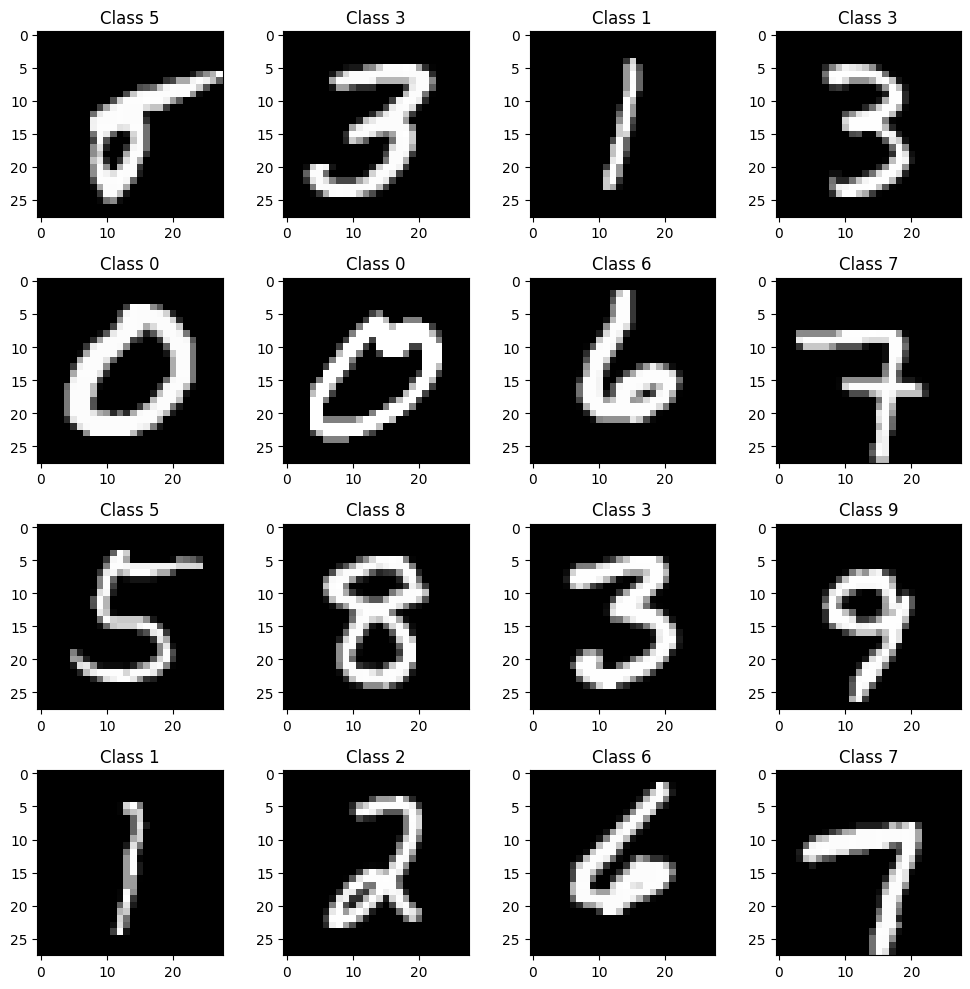

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i in range(16):
    plt.subplot(4,4,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title(f"Class {y_train[num]}")

plt.tight_layout()

**Data normalization :**

We normalize the train and test data such that each pixel is in [0, 1] (instead of [0, 255]). This usually helps the training !

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
nb_classes = 10 # number of unique digits

# One hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


### **Fully connected network**

Create a fully connected network with :
- Two layers with 512 ouput neurons and ReLu activation.
- A final layer with 10 output neurons and a softmax activation.

Hint : You will need to flatten your image before the first dense layer. Use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)



In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train for 5 epochs :

In [7]:
## To-do
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2173 - accuracy: 0.9353 - val_loss: 0.0974 - val_accuracy: 0.9682
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0801 - accuracy: 0.9744 - val_loss: 0.0789 - val_accuracy: 0.9746
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.0654 - val_accuracy: 0.9802
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0692 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0803 - val_accuracy: 0.9775
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0755 - val_accuracy: 0.9795
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 

### **Convolutional Neural Network**

Create a Convolutional Neural Network. You will need to use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) between the convolutional layers and the fully connected layers.

In [8]:
if X_train.ndim == 3:
    X_train = X_train[..., None] # add an additional dimension to represent the single-channel
    X_test = X_test[..., None]
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###  Architecture :
- Two convolutional layers with 32 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- Two convolutional layers with 64 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- One dense layer with 512 ouput neurons and ReLu activation
- A dense layer with 10 output neurons and a softmax activation.


In [9]:
inp_shape = (28, 28, 1)
cnn = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(strides=2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPool2D(strides=2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                 

Train for 5 epochs :

In [10]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 27s 58ms/step - loss: 0.1630 - accuracy: 0.9506 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 2/5
469/469 [==============================] - 27s 58ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0328 - val_accuracy: 0.9901
Epoch 3/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0280 - val_accuracy: 0.9909
Epoch 4/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 5/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0279 - val_accuracy: 0.9911


### Check predictions

Plot a few misclassified images.

In [11]:
y_hat = np.argmax(cnn.predict(X_test), axis=-1)
y = np.argmax(Y_test, axis=-1)

correct = np.nonzero(y == y_hat)[0]
incorrect = np.nonzero(y != y_hat)[0]

313/313 [==============================] - 2s 6ms/step


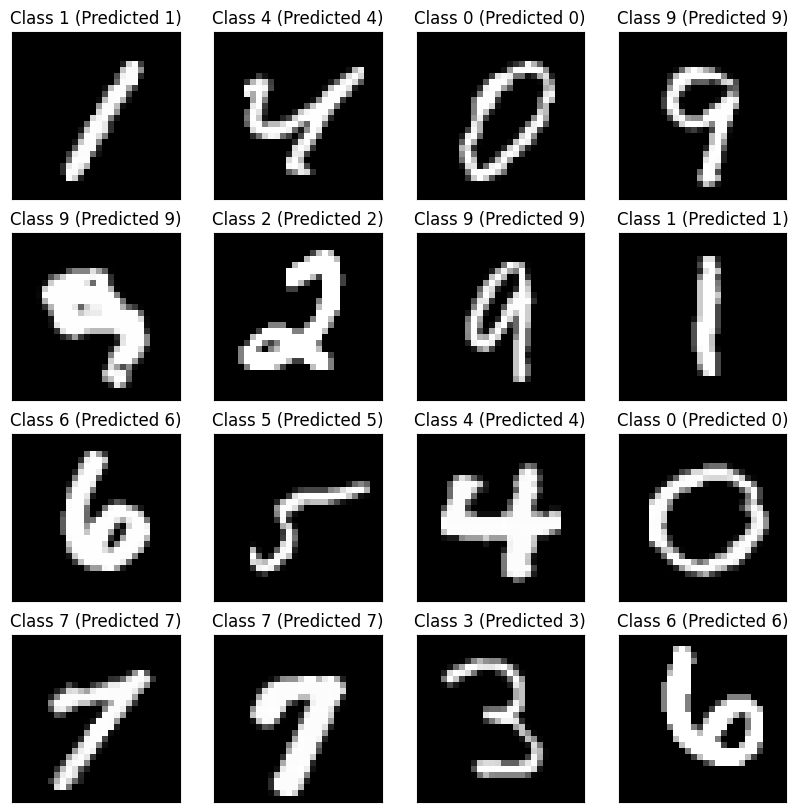

In [12]:
fig = plt.figure(figsize=(10,10))
for j, i in enumerate(np.random.choice(correct, size=16)):
    plt.subplot(4,4,j+1)
    plt.imshow(X_test[i, ..., 0], cmap='gray')
    plt.title(f"Class {y[i]} (Predicted {y_hat[i]})")
    plt.xticks([])
    plt.yticks([])


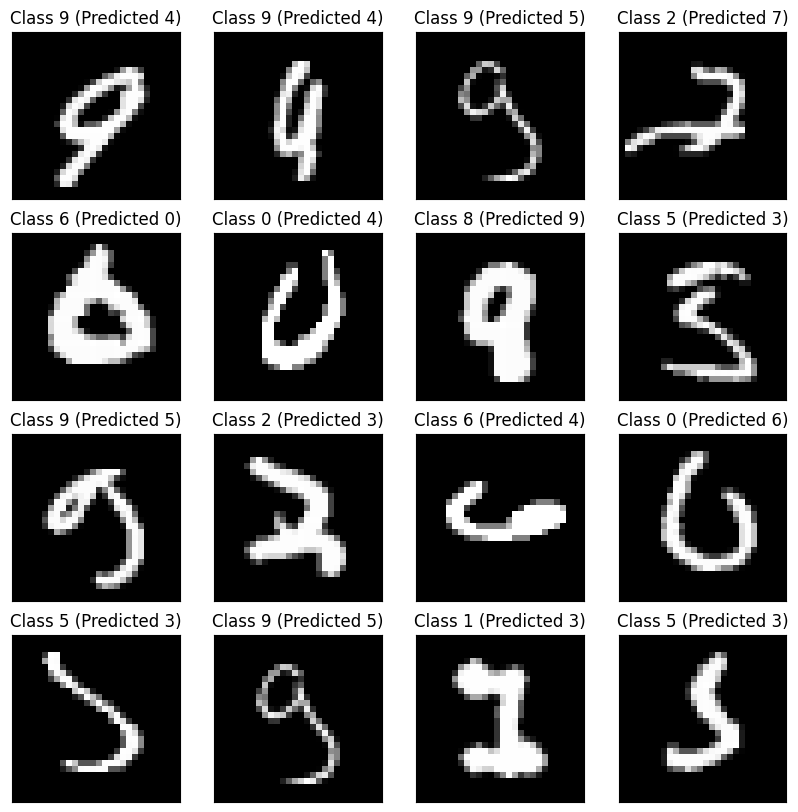

In [13]:
fig = plt.figure(figsize=(10,10))
for j, i in enumerate(np.random.choice(incorrect, size=16)):
    plt.subplot(4,4,j+1)
    plt.imshow(X_test[i, ..., 0], cmap='gray')
    plt.title(f"Class {y[i]} (Predicted {y_hat[i]})")
    plt.xticks([])
    plt.yticks([])
